**12.8**

In Section 12.2.3, a formula for calculating PVE was given in Equation 12.10. We also saw that the PVE can be obtained using the explained_variance_ratio_ attribute of a fitted PCA() estimator. On the USArrests data, calculate PVE in two ways:

In [2]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots, cm
import statsmodels.api as sm
from scipy.stats import (ttest_1samp,
                         ttest_rel,
                         ttest_ind,
                         t as t_dbn)
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multitest import multipletests as mult_test
from statsmodels.datasets import get_rdataset
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.tree import (DecisionTreeClassifier as DTC, 
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss,
                             RocCurveDisplay)
from sklearn.ensemble import \
                             (RandomForestRegressor as RF,
                             GradientBoostingRegressor as GBR)
from ISLP.bart import BART
from statsmodels.datasets import get_rdataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import \
 (KMeans,
 AgglomerativeClustering)
from scipy.cluster.hierarchy import \
 (dendrogram,
 cut_tree)
from ISLP.cluster import compute_linkage
import warnings; warnings.simplefilter('ignore')

usarr = get_rdataset('USArrests').data
usarr

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


(a)

Using the explained_variance_ratio_ output of the fitted PCA() estimator, as was done in Section 12.2.3.

In [3]:
scaler = StandardScaler(with_std=True,
                       with_mean=True)
usarr_scaled = scaler.fit_transform(usarr)
pca = PCA()
pca.fit(usarr_scaled)
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

(b)

By applying Equation 12.10 directly. The loadings are stored as the components_ attribute of the fitted PCA() estimator. Use those loadings in Equation 12.10 to obtain the PVE.

In [4]:
loadings = pca.components_.T
M = loadings.shape[1]
pve = []
val = np.sum(usarr_scaled**2)
Z = loadings.T@usarr_scaled.T
for m in range(M):
    z = np.sum(Z[m,:]**2)
    pve.append(z/val)
pve

[0.6200603947873733,
 0.24744128813496044,
 0.08914079514520752,
 0.04335752193245881]

In [13]:
scores = pca.transform(usarr_scaled)
scores

array([[ 9.85565885e-01, -1.13339238e+00, -4.44268788e-01,
        -1.56267145e-01],
       [ 1.95013775e+00, -1.07321326e+00,  2.04000333e+00,
         4.38583440e-01],
       [ 1.76316354e+00,  7.45956781e-01,  5.47808243e-02,
         8.34652924e-01],
       [-1.41420290e-01, -1.11979678e+00,  1.14573692e-01,
         1.82810896e-01],
       [ 2.52398013e+00,  1.54293399e+00,  5.98556799e-01,
         3.41996478e-01],
       [ 1.51456286e+00,  9.87555085e-01,  1.09500699e+00,
        -1.46488703e-03],
       [-1.35864746e+00,  1.08892789e+00, -6.43257569e-01,
         1.18469414e-01],
       [ 4.77093091e-02,  3.25358925e-01, -7.18632942e-01,
         8.81977637e-01],
       [ 3.01304227e+00, -3.92285133e-02, -5.76829492e-01,
         9.62847520e-02],
       [ 1.63928304e+00, -1.27894240e+00, -3.42460080e-01,
        -1.07679681e+00],
       [-9.12657146e-01,  1.57046001e+00,  5.07818939e-02,
        -9.02806864e-01],
       [-1.63979985e+00, -2.10972917e-01,  2.59801342e-01,
      

**12.9**

Consider the USArrests data. We will now perform hierarchical clustering on the states.

In [140]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots, cm
import statsmodels.api as sm
from scipy.stats import (ttest_1samp,
                         ttest_rel,
                         ttest_ind,
                         t as t_dbn)
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multitest import multipletests as mult_test
from statsmodels.datasets import get_rdataset
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.tree import (DecisionTreeClassifier as DTC, 
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss,
                             RocCurveDisplay)
from sklearn.ensemble import \
                             (RandomForestRegressor as RF,
                             GradientBoostingRegressor as GBR)
from ISLP.bart import BART
from statsmodels.datasets import get_rdataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import \
                             (KMeans,
                             AgglomerativeClustering)
from scipy.cluster.hierarchy import \
                             (dendrogram,
                             cut_tree)
from ISLP.cluster import compute_linkage
import warnings; warnings.simplefilter('ignore')
import os
import sys

usarr = get_rdataset('USArrests').data
usarr.head()

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


(a)

Using hierarchical clustering with complete linkage and Euclidean distance, cluster the states.

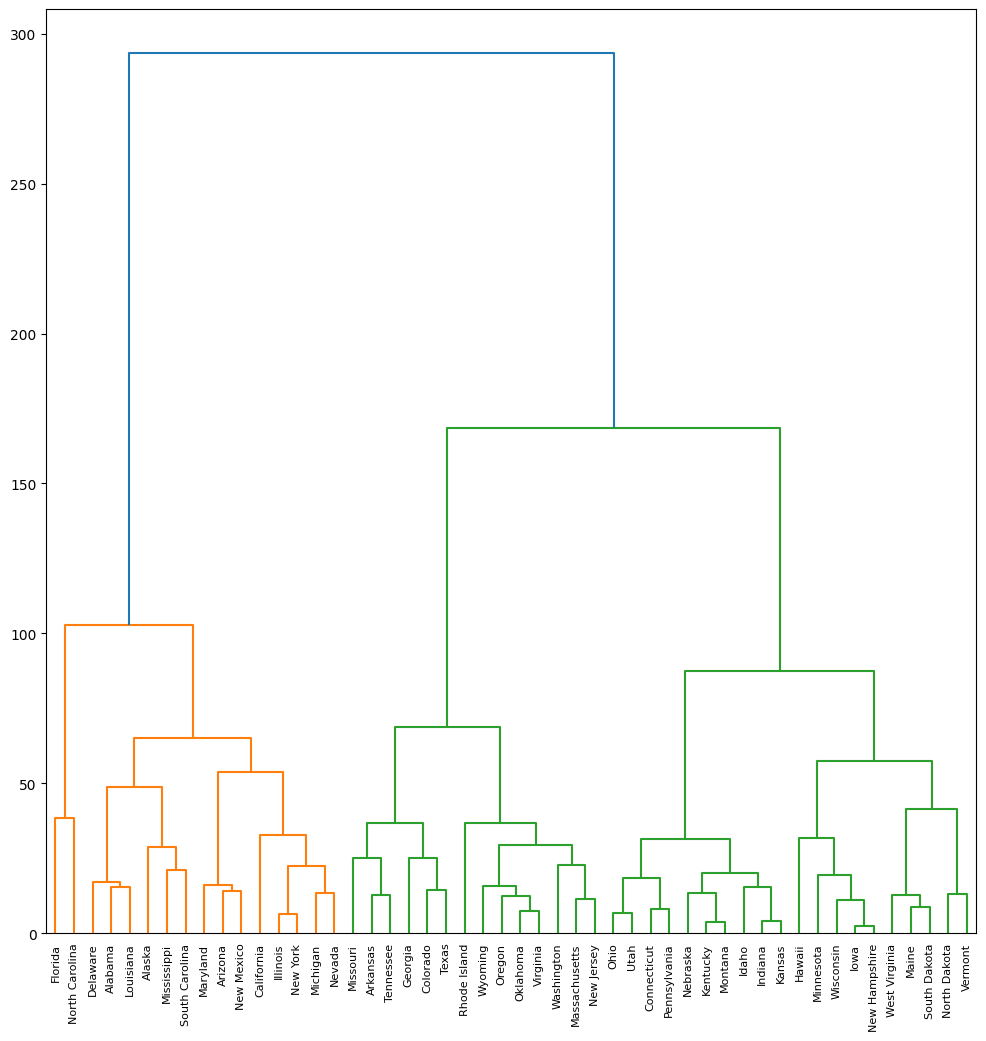

In [141]:
HClust = AgglomerativeClustering
hc_comp = HClust(distance_threshold=0,
                n_clusters=None,
                linkage='complete')
hc_comp.fit(usarr)
cargs={'color_threshold': 4,
      'above_threshold_color': 'black'}
linkage_comp1 = compute_linkage(hc_comp)

f = open(os.devnull, 'w')
temp = sys.stdout
sys.stdout = f
fig,ax = subplots(figsize=(12,12))
dendrogram(linkage_comp1,
         ax=ax,
          labels=usarr.T.columns)
sys.stdout = temp

(b)

Cut the dendrogram at a height that results in three distinct clusters. Which states belong to which clusters?

**Ans:**

We can see from the tree that the height that results in three clusters is approximately 120

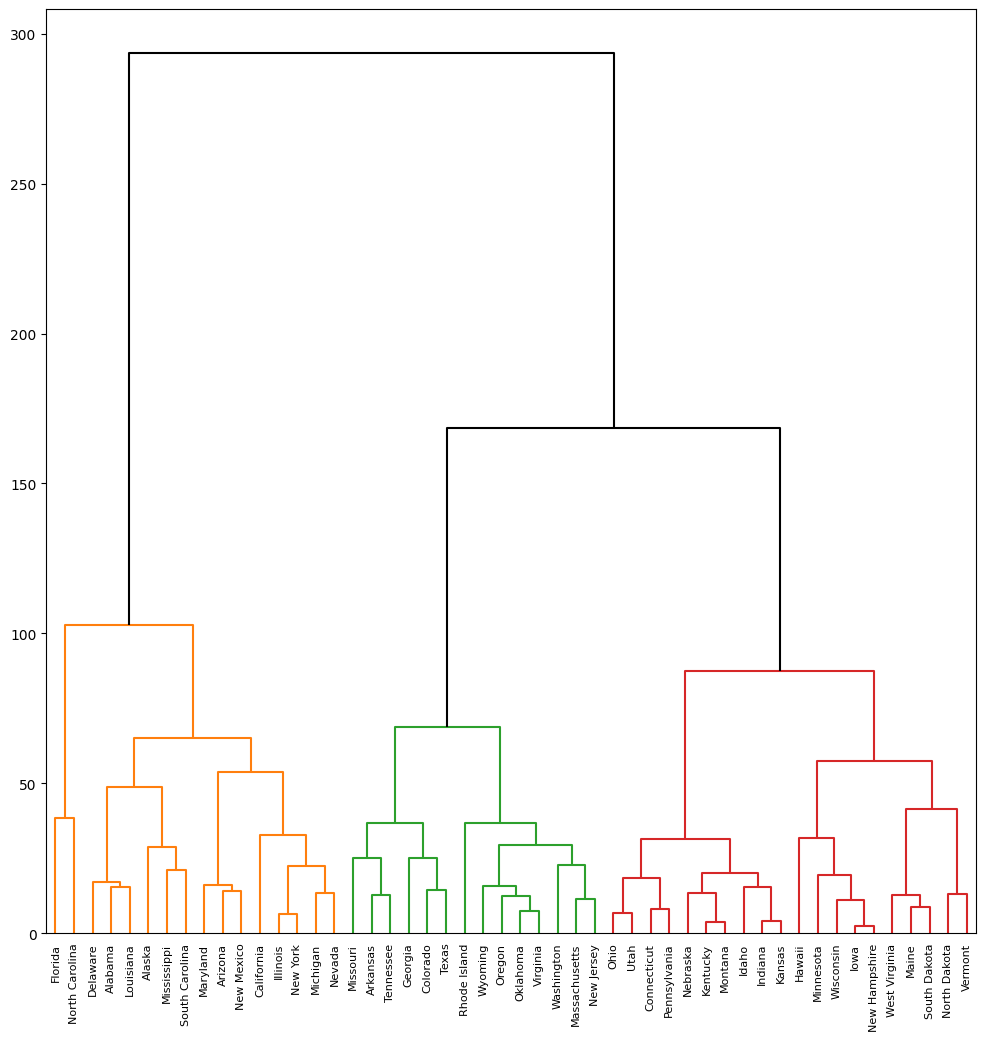

In [142]:
fig,ax = subplots(figsize=(12,12))
cargs={'color_threshold': 120,
      'above_threshold_color': 'black'}
f = open(os.devnull, 'w')
temp = sys.stdout
sys.stdout = f
dendrogram(linkage_comp1,
         ax=ax,
          labels=usarr.T.columns,
          **cargs)
sys.stdout = temp

(c)

Hierarchically cluster the states using complete linkage and Euclidean distance, after scaling the variables to have standard deviation one.

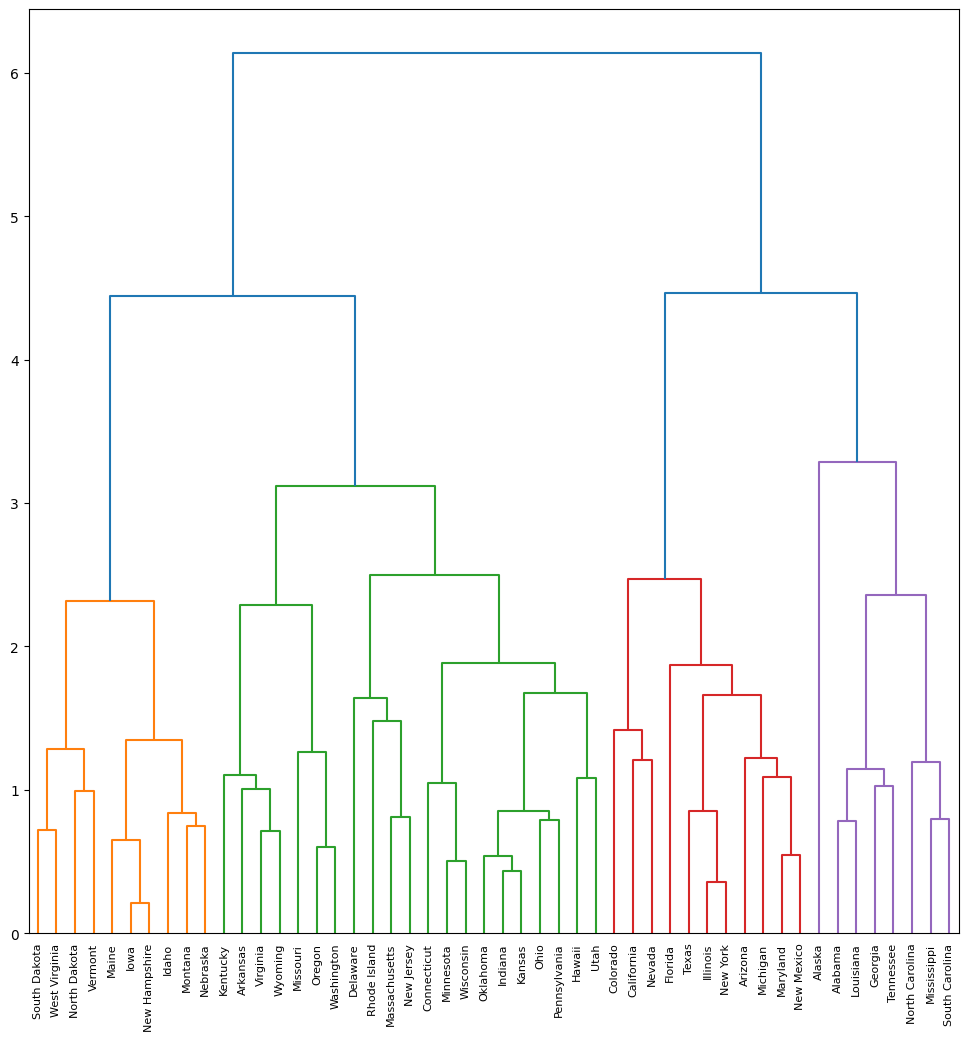

In [143]:
scaler = StandardScaler()
usarr_scaled = scaler.fit_transform(usarr)

HClust = AgglomerativeClustering
hc_comp = HClust(distance_threshold=0,
                n_clusters=None,
                linkage='complete')
hc_comp.fit(usarr_scaled)
cargs={'color_threshold': 4,
      'above_threshold_color': 'black'}
linkage_comp2 = compute_linkage(hc_comp)
fig,ax = subplots(figsize=(12,12))
f = open(os.devnull, 'w')
temp = sys.stdout
sys.stdout = f
dendrogram(linkage_comp2,
         ax=ax,
          labels=usarr.T.columns)
sys.stdout = temp

(d)

What effect does scaling the variables have on the hierarchical clustering obtained? In your opinion, should the variables be scaled before the inter-observation dissimilarities are computed?
Provide a justification for your answer.

In [168]:
unscaled = cut_tree(linkage_comp1,height=120)
scaled = cut_tree(linkage_comp2,height=4)
df = pd.DataFrame({'Unscaled': np.ravel(unscaled),'Scaled':np.ravel(scaled)},index=usarr.T.columns)

df

,Unscaled,Scaled
rownames,,
Alabama,0,0
Alaska,0,0
Arizona,0,1
Arkansas,1,2
California,0,1
Colorado,1,1
Connecticut,2,2
Delaware,0,2
Florida,0,1


We can see that the amount of estimated clusters were increased, some states shifted to different clusters. For this dataset it would be beneficial to scale the data before processing since the features murder, rape, assault are per 100000 and urbanpop is a percentage of urban population, features are of different scale then we need to scale the data before processing.
____________________________________________________________________________________________________________________________________________________________________

**12.10**

In this problem, you will generate simulated data, and then perform PCA and K-means clustering on the data.

In [220]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots, cm
import statsmodels.api as sm
from scipy.stats import (ttest_1samp,
                         ttest_rel,
                         ttest_ind,
                         t as t_dbn)
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multitest import multipletests as mult_test
from statsmodels.datasets import get_rdataset
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.tree import (DecisionTreeClassifier as DTC, 
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss,
                             RocCurveDisplay)
from sklearn.ensemble import \
                             (RandomForestRegressor as RF,
                             GradientBoostingRegressor as GBR)
from ISLP.bart import BART
from statsmodels.datasets import get_rdataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import \
                             (KMeans,
                             AgglomerativeClustering)
from scipy.cluster.hierarchy import \
                             (dendrogram,
                             cut_tree)
from ISLP.cluster import compute_linkage
import warnings; warnings.simplefilter('ignore')
import os
import sys

(a)

Generate a simulated data set with 20 observations in each of three classes (i.e. 60 observations total), and 50 variables.

Hint: There are a number of functions in Python that you can use to generate data. One example is the normal() method of the random() function in numpy; the uniform() method is another option. Be sure to add a mean shift to the observations in each class so that there are three distinct classes.

In [221]:
rng = np.random.default_rng(1)
df = pd.DataFrame()
for i in range(50):
    x1 = rng.normal(size=20) - 2
    x2 = rng.normal(size=20) + 2
    x3 = rng.normal(size=20)
    x = 'x{}'.format(i+1)
    df[x] = np.concatenate([x1,x2,x3])
#np.vstack([x1,x2]).shape
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50
0,-1.654416,-1.945898,-0.476062,-1.506972,-1.904269,-2.592775,-1.325648,-2.139389,-2.239049,-1.979822,...,-2.161560,-2.971206,-2.224337,-1.980190,-1.753593,-1.637540,-3.821931,-2.940786,-1.868365,-1.502855
1,-1.178382,-1.727209,-3.524686,-1.838841,-2.178470,-2.157837,-0.994356,-1.942583,-1.489078,-1.016369,...,-0.781949,-3.936993,-1.255464,-2.425363,-1.875537,-1.650118,-3.635541,-1.837865,-2.713642,-2.797660
2,-1.669563,-2.982188,-4.466229,-2.932220,-1.797376,-2.481280,-2.735990,-2.202749,-0.998114,-2.966133,...,-1.942403,-1.811603,-0.765757,-1.244558,-3.179731,-2.097899,-1.465224,-1.172327,-2.833859,-1.479693
3,-3.303157,-3.107373,-1.383121,0.871567,-3.605748,-2.701479,-2.051229,-1.384995,-1.605079,-1.248985,...,-2.497798,-0.700781,-2.063237,-2.965805,-2.555406,-1.576630,-0.571765,-1.391861,-1.322147,-3.434936
4,-1.094644,-1.800415,0.547898,-1.119741,-0.187770,-1.861806,-1.961045,-1.689652,0.552859,-2.087248,...,-3.359798,-0.808423,-2.361299,-3.218734,-0.608012,-1.457912,-2.705768,-1.277139,-0.223437,-1.770326


(b)

Perform PCA on the 60 observations and plot the first two principal component score vectors. Use a different color to indicate the observations in each of the three classes. If the three classes appear separated in this plot, then continue on to part (c). If not, then return to part (a) and modify the simulation so that there is greater separation between the three classes. Do not continue to part (c) until the three classes show at least some separation in the first two principal component score vectors.

In [1]:
true = np.zeros(60,dtype=int)
true[20:40] = 1
true[40:] = 2
pca = PCA()
pca.fit(df)
scores = pca.transform(df)
PCvec = []
fig, ax = subplots(figsize=(12,12))
ax.scatter(scores[:,0],scores[:,1],c=true,cm=cmap)
#ax.set_xlim(-2,2)
#ax.set_ylim(-2,2)

NameError: name 'np' is not defined

In [223]:
pca.components_.shape

(50, 50)

__________________________________________________________________________________________________________________________________________________________________________________________________

(c)

Perform K-means clustering of the observations with K =3. How well do the clusters that you obtained in K-means clustering compare to the true class labels?

Hint: You can use the pd.crosstab() function in Python to compare the true class labels to the class labels obtained by clustering. Be careful how you interpret the results: K-means clustering will arbitrarily number the clusters, so you cannot simply check whether the true class labels and clustering labels are the same.

In [224]:
kmeans = KMeans(n_clusters=3,
               random_state=0,
               n_init=20).fit(df)

In [225]:
true = np.zeros(60,dtype=int)
true[20:40] = 1
true[40:] = 2
pd.crosstab(pd.Series(kmeans.labels_, name='K-means'),
          pd.Series(true,name='True Labels'))

True Labels,0,1,2
K-means,,,
0,0,20,0
1,20,0,0
2,0,0,20


(d)

Perform K-means clustering with K =2. Describe your results.

In [226]:
kmeans = KMeans(n_clusters=2,
               random_state=0,
               n_init=20).fit(df)
pd.crosstab(pd.Series(kmeans.labels_, name='K-means'),
          pd.Series(true,name='True Labels'))

True Labels,0,1,2
K-means,,,
0,0,20,0
1,20,0,20


There is overlap of two classes

(e)

Now perform K-means clustering with K =4, and describe your results.

In [227]:
kmeans = KMeans(n_clusters=4,
               random_state=0,
               n_init=20).fit(df)
pd.crosstab(pd.Series(kmeans.labels_, name='K-means'),
          pd.Series(true,name='True Labels'))

True Labels,0,1,2
K-means,,,
0,0,0,6
1,0,20,0
2,20,0,0
3,0,0,14


It divides the 3rd class up 6 observations on the first cluster then 14 observations in the 4th cluster

(f)

Now perform K-means clustering with $K=3$ on the first two principal component score vectors, rather than on the raw data. That is, perform K-means clustering on the $60\times2$ matrix of which the first column is the first principal component score vector, and the second column is the second principal component score vector. Comment on the results.

In [228]:
pca_scores = np.array((scores[:,0],scores[:,1])).T
kmeans = KMeans(n_clusters=3,
               random_state=0,
               n_init=20).fit(pca_scores)
pd.crosstab(pd.Series(kmeans.labels_, name='K-means'),
          pd.Series(true,name='True Labels'))

True Labels,0,1,2
K-means,,,
0,0,20,0
1,20,0,0
2,0,0,20


(g)

Using the StandardScaler() estimator, perform K-means clustering with $K=3$ on the data after scaling each variable to have standard deviation one. How do these results compare to those obtained in (c)? Explain.

In [177]:
stand = StandardScaler()
X_scaled = stand.fit_transform(df)
kmeans = KMeans(n_clusters=3,
               random_state=0,
               n_init=20).fit(X_scaled)
pd.crosstab(pd.Series(kmeans.labels_, name='K-means'),
          pd.Series(true,name='True Labels'))

True Labels,0,1,2
K-means,,,
0,0,20,0
1,20,0,0
2,0,0,20


We are able to correctly group the classes as in 

**12.13**

On the book website, www.statlearning.com, there is a gene expression data set (Ch12Ex13.csv) that consists of 40 tissue samples with measurements on 1,000 genes. The first 20 samples are from healthy patients, while the second 20 are from a diseased group.

In [212]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots, cm
import statsmodels.api as sm
from scipy.stats import (ttest_1samp,
                         ttest_rel,
                         ttest_ind,
                         t as t_dbn)
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multitest import multipletests as mult_test
from statsmodels.datasets import get_rdataset
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.tree import (DecisionTreeClassifier as DTC, 
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss,
                             RocCurveDisplay)
from sklearn.ensemble import \
                             (RandomForestRegressor as RF,
                             GradientBoostingRegressor as GBR)
from ISLP.bart import BART
from statsmodels.datasets import get_rdataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import \
                             (KMeans,
                             AgglomerativeClustering)
from scipy.cluster.hierarchy import \
                             (dendrogram,
                             cut_tree)
from ISLP.cluster import compute_linkage
import warnings; warnings.simplefilter('ignore')
import os
import sys

(a)

Load in the data using pd.read_csv(). You will need to select header = None.

In [213]:
gene = pd.read_csv('Ch12Ex13.csv',header=None).T
gene.shape

(40, 1000)

(b)

Apply hierarchical clustering to the samples using correlation based distance, and plot the dendrogram. Do the genes separate the samples into the two groups? Do your results depend on the type of linkage used?

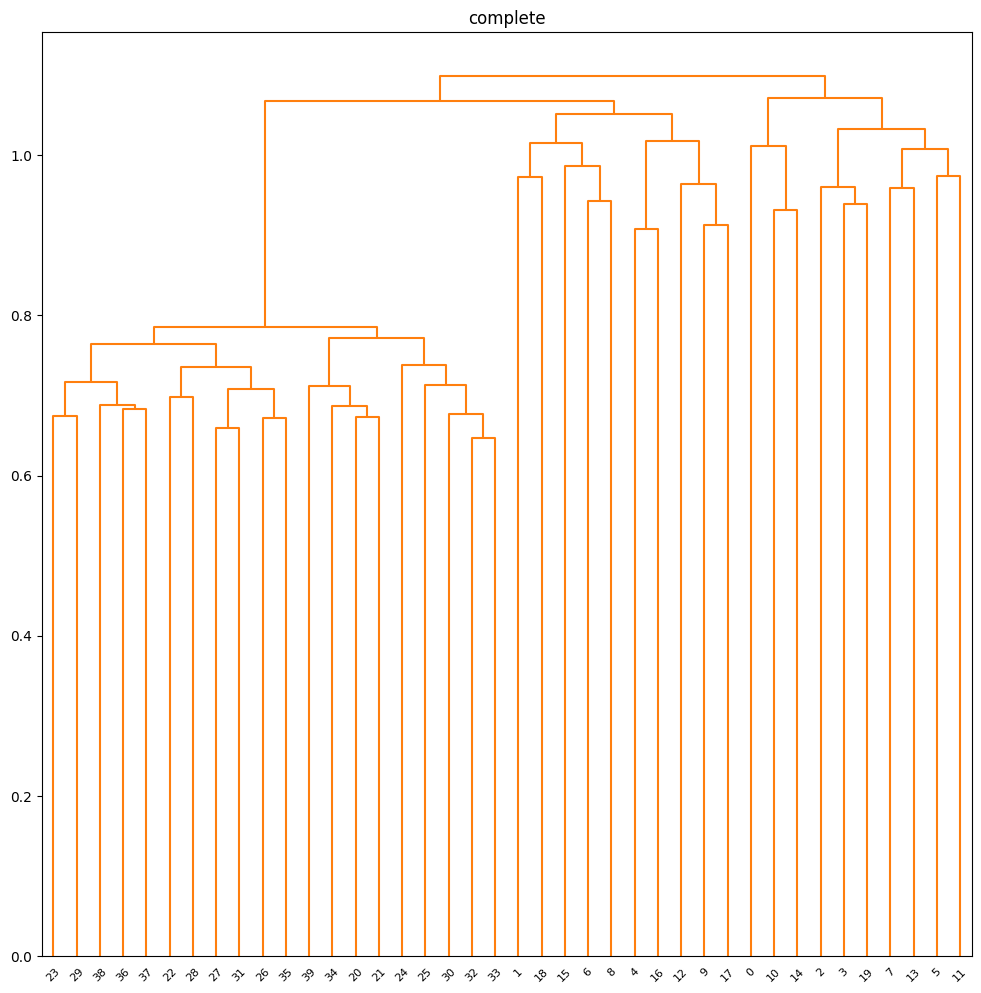

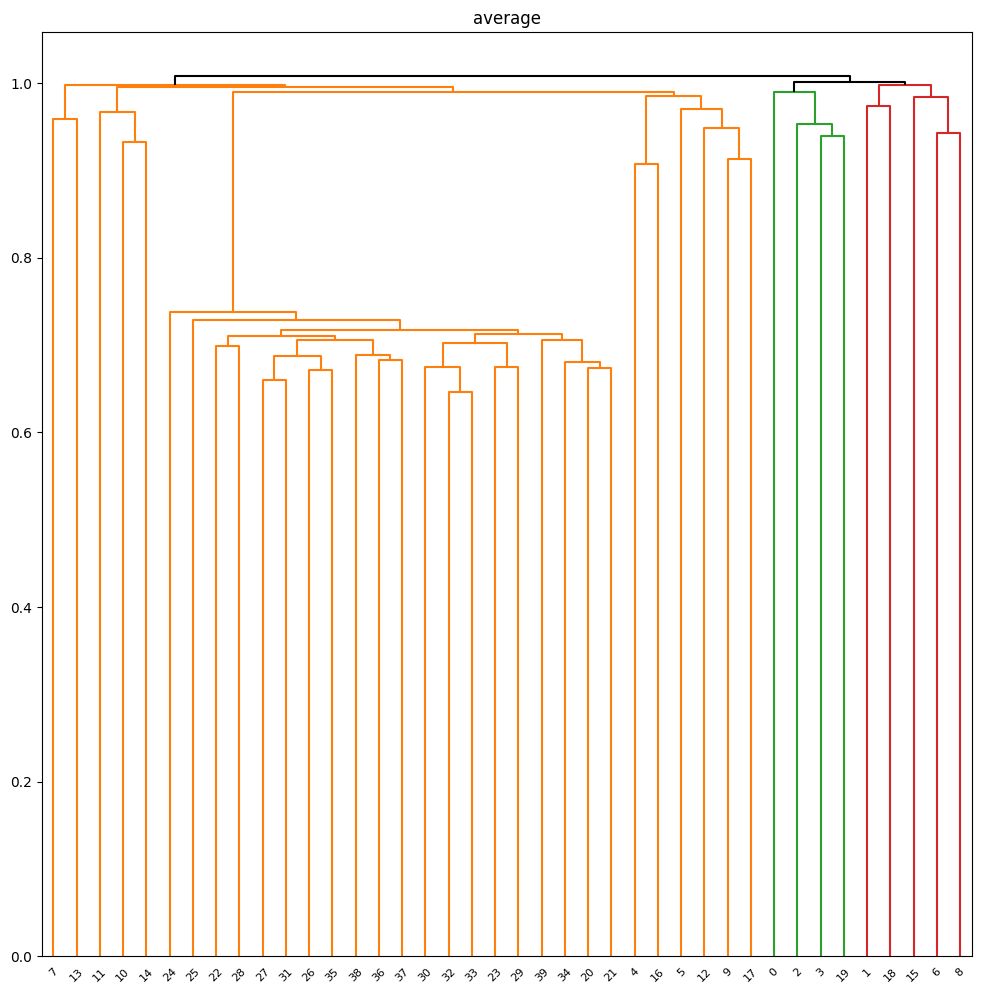

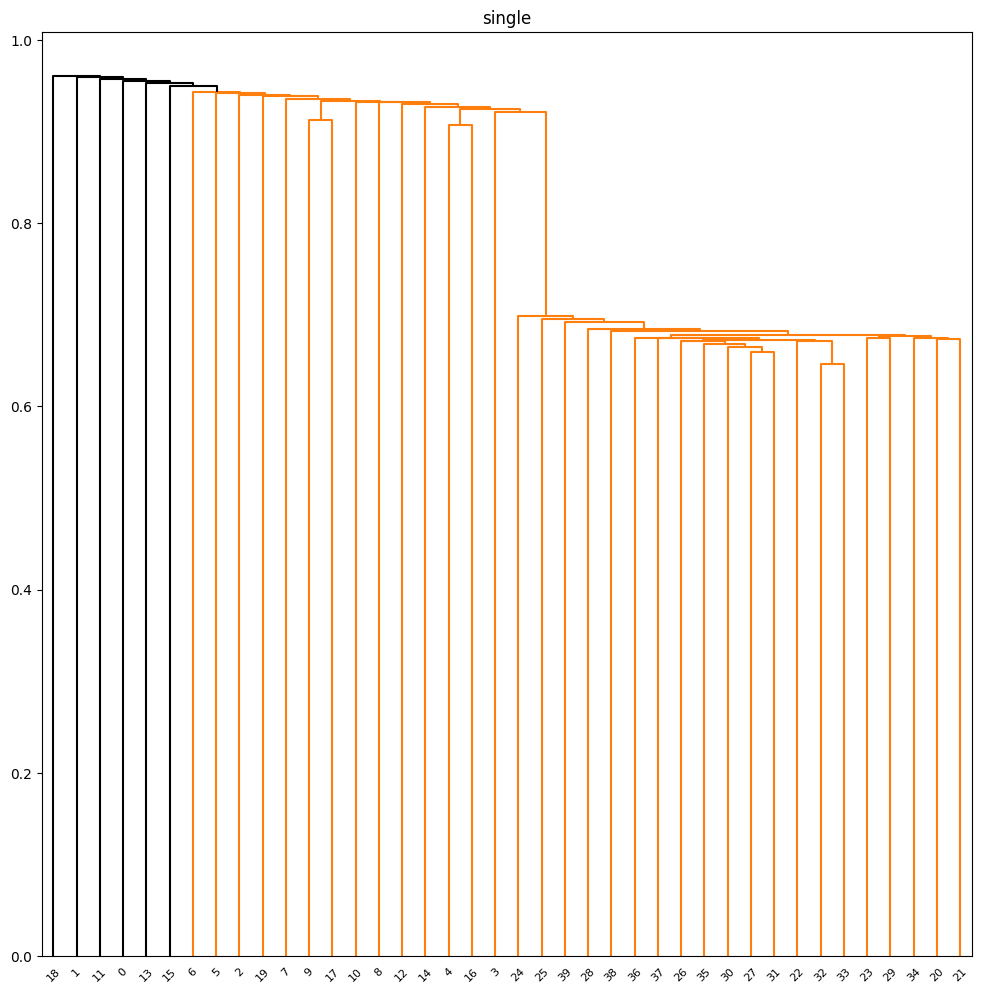

In [214]:
linkage = ['complete', 'average','single']
stand = StandardScaler()

HClust = AgglomerativeClustering
gene_scaled = stand.fit_transform(gene)
cor = 1 - np.corrcoef(gene)
hc_cor = HClust(distance_threshold=0,
                linkage='complete',
                n_clusters=None,
               metric='precomputed')
test = []
j = 0
cut = [1.1, 1.0,0.95]
for i in linkage:
    hc_cor = HClust(distance_threshold=0,
                linkage=i,
                n_clusters=None,
               metric='precomputed')
    hc_cor.fit(cor)
    cargs = {'color_threshold':cut[j],
         'above_threshold_color':'black'}
    link = compute_linkage(hc_cor)
    ax = subplots(figsize=(12,12))[1]
    ax.set_title(f"{i}")
    f = open(os.devnull, 'w')
    temp = sys.stdout
    sys.stdout = f
    dendrogram(link, ax=ax, labels=gene.T.columns, **cargs)
    sys.stdout = temp
    s = cut_tree(link,n_clusters=2)
    test.append(s)
    j += 1

In [216]:
df = pd.DataFrame({'Complete': np.ravel(test[0]),'Average':np.ravel(test[1]), 'Single': np.ravel(test[2])},index=gene.T.columns)
df

,Complete,Average,Single
0,0,0,0
1,1,0,0
2,0,0,0
3,0,0,0
4,1,1,0
5,0,1,0
6,1,0,0
7,0,1,0
8,1,0,0
9,1,1,0


By not scaling the gene dataset then the clusters will vary with different linkage.

But if we scale the gene dataset we get:

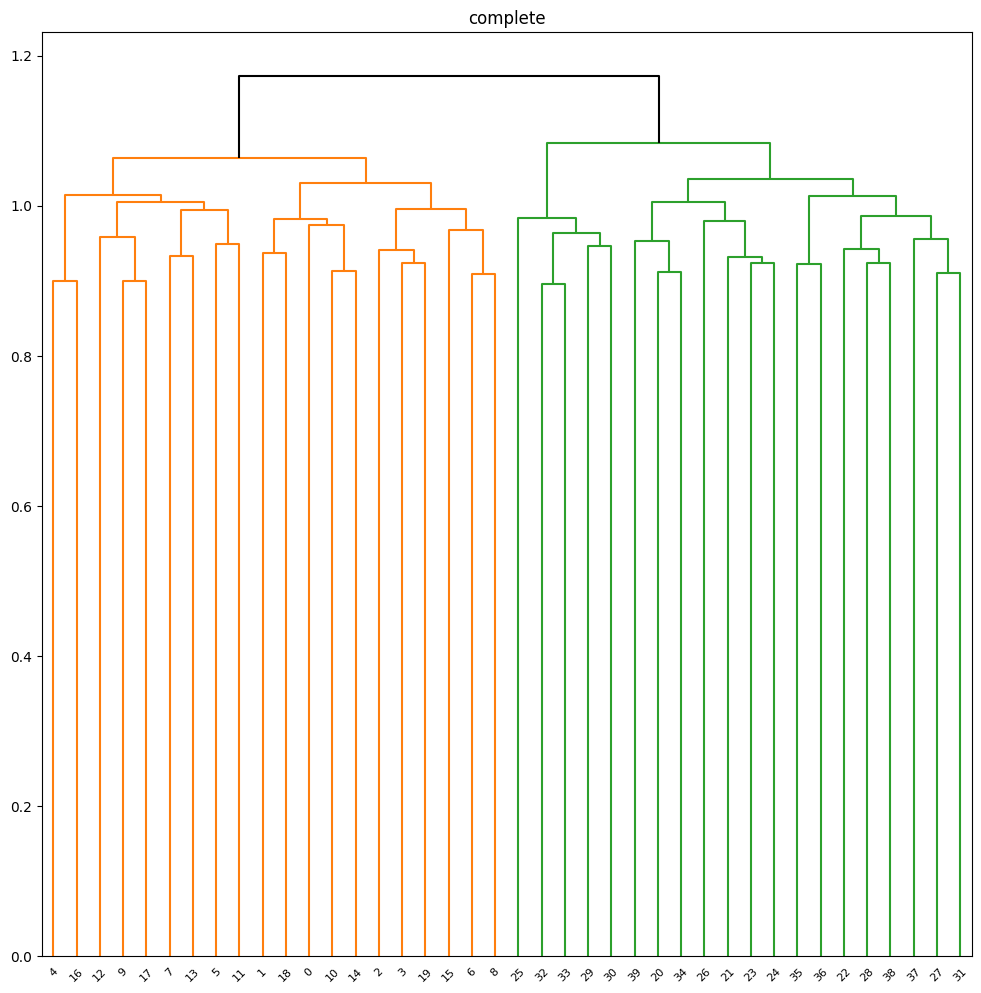

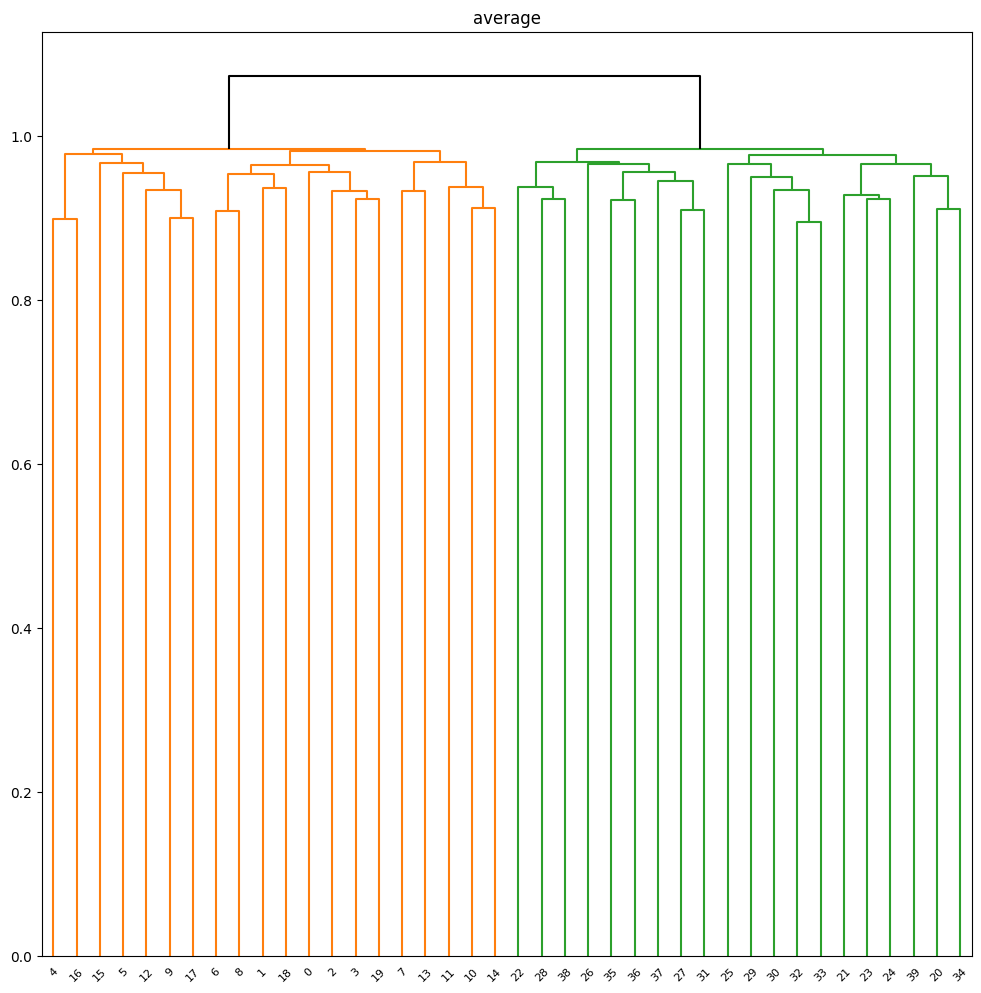

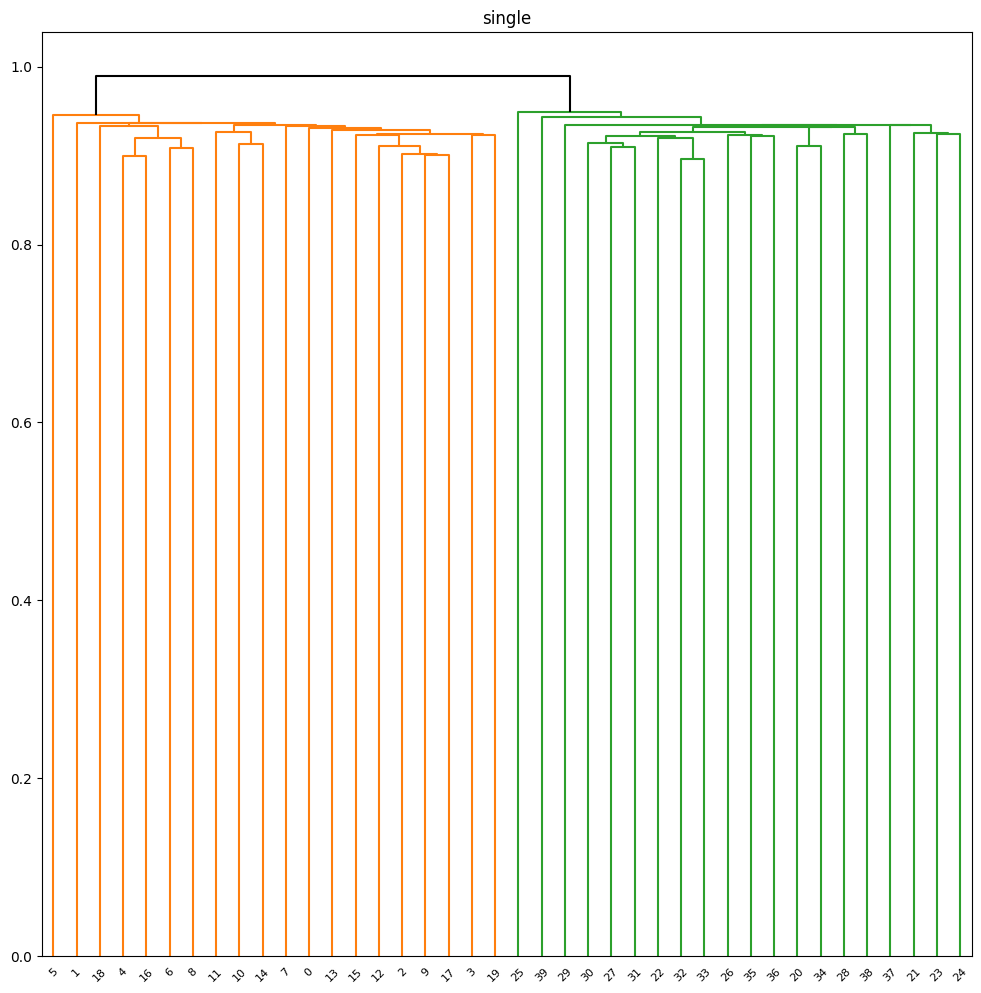

In [195]:
cor = 1 - np.corrcoef(gene_scaled)
hc_cor = HClust(distance_threshold=0,
                linkage='complete',
                n_clusters=None,
               metric='precomputed')

test = []
j = 0
cut = [1.1, 1.0,0.95]
for i in linkage:
    hc_cor = HClust(distance_threshold=0,
                linkage=i,
                n_clusters=None,
               metric='precomputed')
    hc_cor.fit(cor)
    cargs = {'color_threshold':cut[j],
         'above_threshold_color':'black'}
    link = compute_linkage(hc_cor)
    ax = subplots(figsize=(12,12))[1]
    ax.set_title(f'{i}')
    f = open(os.devnull, 'w')
    temp = sys.stdout
    sys.stdout = f
    dendrogram(link, ax=ax, labels=gene.T.columns, **cargs)
    sys.stdout = temp
    s = cut_tree(link,n_clusters=2)
    test.append(s)
    j += 1

In [190]:
df = pd.DataFrame({'Complete': np.ravel(test[0]),'Average':np.ravel(test[1]), 'Single': np.ravel(test[2])},index=gene.T.columns)
df

,Complete,Average,Single
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,0,0,0
7,0,0,0
8,0,0,0
9,0,0,0


The choice of linkage does not affect the cluster which gene belongs to.
_______________________________________________________________________________________________________________

(c)

Your collaborator wants to know which genes differ the most across the two groups. Suggest a way to answer this question, and apply it here.

**Ans**

We could look at the gene that has the highest variance across the two groups. One way to acomplish this is to use 

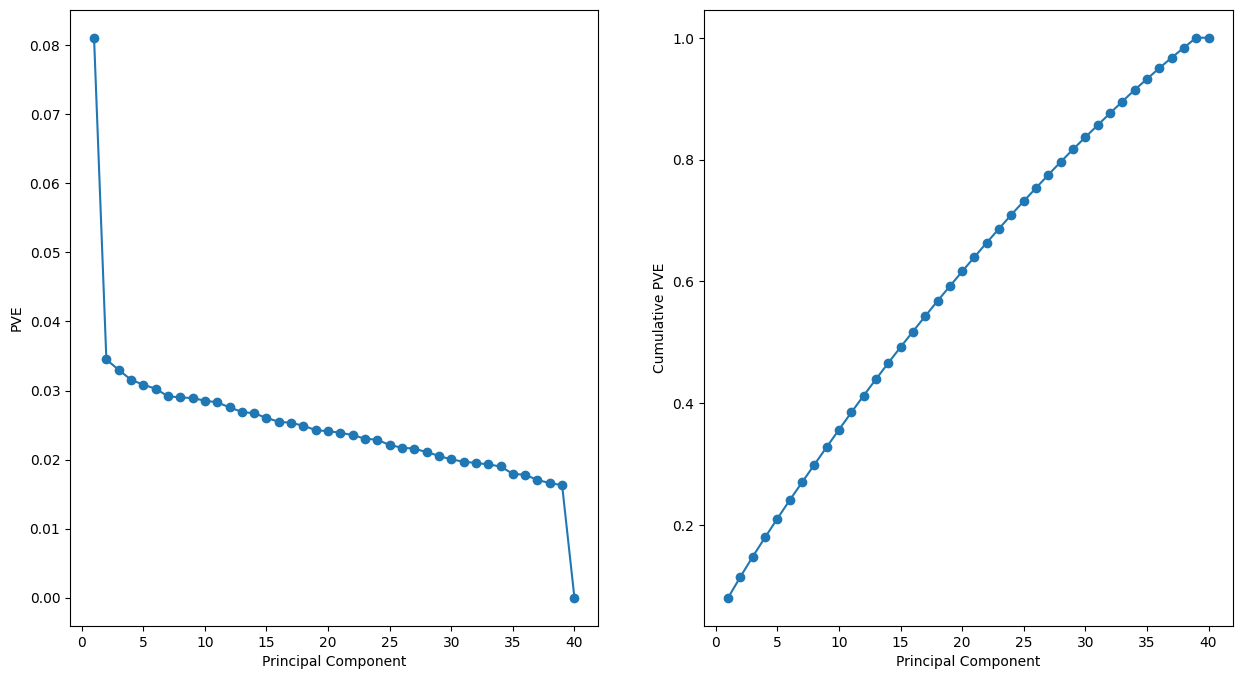

In [201]:
gene_pca = PCA()
gene_pca.fit_transform(gene_scaled)

ticks = np.arange(gene_pca.n_components_)+1
fig, axes = subplots(1,2,figsize=(15,8))
ax = axes[0]
ax.plot(ticks,
        gene_pca.explained_variance_ratio_,
        marker='o')
ax.set_xlabel('Principal Component');
ax.set_ylabel('PVE')
ax = axes[1]
ax.plot(ticks,
        gene_pca.explained_variance_ratio_.cumsum(),
        marker='o');
ax.set_xlabel('Principal Component')
ax.set_ylabel('Cumulative PVE');

Via the Scree plot we can see that its takes an elbow shape after the first PC. Now we can look at the loading vector for the 1st PC to find out which gene contributes most to the variance of the data.

In [211]:
loading = pca.components_

df = pd.DataFrame({'|Loadings|': np.abs(loading[0,:])}, index=gene.columns).sort_values(by='|Loadings|')
           


#pd.crosstab(pd.Series(kmeans.labels_, name='K-means'),
#          pd.Series(true,name='True Labels'))
df

,|Loadings|
821,0.000014
638,0.000028
849,0.000071
933,0.000108
645,0.000135
...,...
599,0.091673
589,0.091732
564,0.091838
588,0.094498
